ref
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [5]:
import pandas as pd

In [38]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [9]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [10]:
pd.melt(df, id_vars=['A'], value_vars=['B'],
        var_name='myVarname', value_name='myValname')

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5


In [11]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], ignore_index=False)

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
0,a,C,2
1,b,C,4
2,c,C,6


### 숙제
- melt를 이용해서 풀어보기

In [50]:
df = pd.read_csv('menu.csv')

In [51]:
df.head(2)

,ename,gmail,github,domain,vercel,role,2025-01-07,2025-01-08,2025-01-09,2025-01-10,...,2025-01-16,2025-01-17,2025-01-20,2025-01-21,2025-01-22,2025-01-23,2025-01-24,2025-02-03,2025-02-04,2025-02-05
0,TOM,tom@diginori.com,ppabam,sunsin.shop,https://sunsin.vercel.app,PM,순대국,비지찌개,"냉동김밥,컵라면",잔치국수,...,오징어 덮밥,짜장면,집밥 도시락,소고기무국,-,오징어덮밥,볶음밥,짜장면,-,-
1,cho,j01040864205@gmail.com,cho6019,cho6019.store,https://cho6019.vercel.app,행동강령 수립 위원회,닭개장,규동,얼큰 순대국밥,스파게티,...,간짜장,스파게티,버섯 비프 카레,스파게티,설렁탕,치킨마요덮밥,등심돈까스,"치즈라면, 김밥",-,-


In [52]:
rdf= pd.melt(df, id_vars=['ename'], value_vars=(df.columns[6:-2]),var_name='dt', value_name='menu')
rdf

,ename,dt,menu
0,TOM,2025-01-07,순대국
1,cho,2025-01-07,닭개장
2,hyun,2025-01-07,"닭개장(특) , 꽈배기"
3,JERRY,2025-01-07,닭개장
4,SEO,2025-01-07,볶음밥
...,...,...,...
145,jiwon,2025-02-03,잔치국수
146,jacob,2025-02-03,김치 찌개
147,heejin,2025-02-03,샌드위치
148,lucas,2025-02-03,제육볶음


In [60]:
# 결측치 확인 (True 값)
rdf[rdf['menu'].isin(['-','<결석>','x'])]

,ename,dt,menu
45,jiwon,2025-01-13,-
55,jiwon,2025-01-14,-
65,jiwon,2025-01-15,-
83,JERRY,2025-01-17,<결석>
109,nuni,2025-01-21,x
110,TOM,2025-01-22,-
134,SEO,2025-01-24,-


In [62]:
# 결측치 없는 값만 나오게 하기 (False 값)
not_na_rdf = rdf[~rdf['menu'].isin(['-','<결석>','x'])]
not_na_rdf

,ename,dt,menu
0,TOM,2025-01-07,순대국
1,cho,2025-01-07,닭개장
2,hyun,2025-01-07,"닭개장(특) , 꽈배기"
3,JERRY,2025-01-07,닭개장
4,SEO,2025-01-07,볶음밥
...,...,...,...
145,jiwon,2025-02-03,잔치국수
146,jacob,2025-02-03,김치 찌개
147,heejin,2025-02-03,샌드위치
148,lucas,2025-02-03,제육볶음


In [69]:
# -, 결석, x 제외하고 menu 갯수 count 하기
gdf = not_na_rdf.groupby('ename')['menu'].count().reset_index()
gdf.head(3)

,ename,menu
0,JERRY,14
1,SEO,14
2,TOM,14


<Axes: xlabel='ename'>

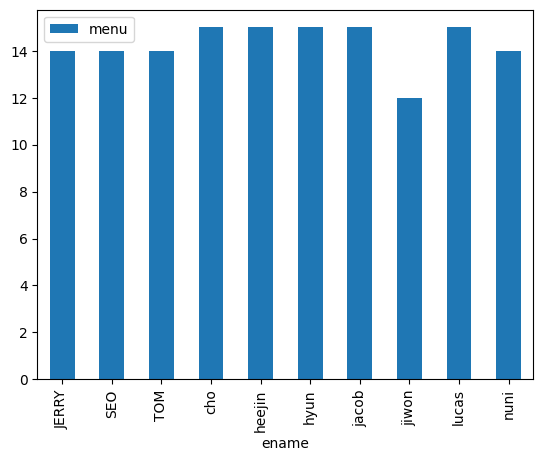

In [77]:
gdf.plot(x="ename", y="menu", kind="bar")

In [37]:
for i in range(len(rdf)):
    print(f"{rdf.iloc[i]['dt']}: {rdf.iloc[i]['ename']}, {rdf.iloc[i]['menu']}")

2025-01-07: TOM, 순대국
2025-01-07: cho, 닭개장
2025-01-07: hyun, 닭개장(특) , 꽈배기
2025-01-07: JERRY, 닭개장
2025-01-07: SEO, 볶음밥
2025-01-07: jiwon, 닭개장
2025-01-07: jacob, 자장면
2025-01-07: heejin, 덮밥
2025-01-07: lucas, 볶음밥
2025-01-07: nuni, 일반 짬뽕 보통
2025-01-08: TOM, 비지찌개
2025-01-08: cho, 규동
2025-01-08: hyun, 주먹밥
2025-01-08: JERRY, 주먹밥
2025-01-08: SEO, 유부초밥
2025-01-08: jiwon, 스키야키
2025-01-08: jacob, 텐동
2025-01-08: heejin, 덮밥
2025-01-08: lucas, 규동
2025-01-08: nuni, 무공 옛날돈가스
2025-01-09: TOM, 냉동김밥,컵라면
2025-01-09: cho, 얼큰 순대국밥
2025-01-09: hyun, 얼큰 순대국밥
2025-01-09: JERRY, 얼큰 순대국밥
2025-01-09: SEO, 볶음밥
2025-01-09: jiwon, 참깨라면 작은컵,삼각김밥
2025-01-09: jacob, 얼큰 설렁탕
2025-01-09: heejin, 설렁탕
2025-01-09: lucas, 한우 곰탕
2025-01-09: nuni, 얼큰 설렁탕
2025-01-10: TOM, 잔치국수
2025-01-10: cho, 스파게티
2025-01-10: hyun, 불닭로제찜닭
2025-01-10: JERRY, 불닭로제찜닭
2025-01-10: SEO, 볶음밥 , 연어
2025-01-10: jiwon, 불닭로제찜닭
2025-01-10: jacob, 부대찌개
2025-01-10: heejin, 부대찌개
2025-01-10: lucas, 부대찌개
2025-01-10: nuni, 부대찌개
2025-01-13: TOM, 제육덮밥
2025-01-13: ch

In [43]:
for i in range(len(rdf)):
    for j in rdf.columns[:]:
        print(rdf.iloc[i][j])

TOM
2025-01-07
순대국
cho
2025-01-07
닭개장
hyun
2025-01-07
닭개장(특) , 꽈배기
JERRY
2025-01-07
닭개장
SEO
2025-01-07
볶음밥
jiwon
2025-01-07
닭개장
jacob
2025-01-07
자장면
heejin
2025-01-07
덮밥
lucas
2025-01-07
볶음밥
nuni
2025-01-07
일반 짬뽕 보통
TOM
2025-01-08
비지찌개
cho
2025-01-08
규동
hyun
2025-01-08
주먹밥
JERRY
2025-01-08
주먹밥
SEO
2025-01-08
유부초밥
jiwon
2025-01-08
스키야키
jacob
2025-01-08
텐동
heejin
2025-01-08
덮밥
lucas
2025-01-08
규동
nuni
2025-01-08
무공 옛날돈가스
TOM
2025-01-09
냉동김밥,컵라면
cho
2025-01-09
얼큰 순대국밥
hyun
2025-01-09
얼큰 순대국밥
JERRY
2025-01-09
얼큰 순대국밥
SEO
2025-01-09
볶음밥
jiwon
2025-01-09
참깨라면 작은컵,삼각김밥
jacob
2025-01-09
얼큰 설렁탕
heejin
2025-01-09
설렁탕
lucas
2025-01-09
한우 곰탕
nuni
2025-01-09
얼큰 설렁탕
TOM
2025-01-10
잔치국수
cho
2025-01-10
스파게티
hyun
2025-01-10
불닭로제찜닭
JERRY
2025-01-10
불닭로제찜닭
SEO
2025-01-10
볶음밥 , 연어
jiwon
2025-01-10
불닭로제찜닭
jacob
2025-01-10
부대찌개
heejin
2025-01-10
부대찌개
lucas
2025-01-10
부대찌개
nuni
2025-01-10
부대찌개
TOM
2025-01-13
제육덮밥
cho
2025-01-13
한솥
hyun
2025-01-13
한솥
JERRY
2025-01-13
한솥
SEO
2025-01-13
연어덮밥
jiwon
2025-01-13
-
